# SVM model to predict rock type while drilling along drill hole

Using SVM to build and train a model using drilling dataset, and classify the rock mass as hard (1) or soft (0) formation.

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by Kernel funtion of SVM classifier). A separator between the categories is found, then data is transformed in such a way that the separator could be drawn as a hyperplane.

# Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading CSV file

In [2]:
data=pd.read_csv('drill_data.csv')
data

# Feature 'Hard Rock' is used to tell whether the rock mass is categorized under hard formation or not, which is 1 o/w 0.

,Depth (m),Rotary Speed (RPM),Bit Load (N/100),Torque (N.cm),ROP (cm/min),Hard Rock
0,0.1,40.9972,146.8531,79.0698,26.3889,0
1,0.2,39.0582,146.8531,75.3488,20.1389,0
2,0.3,44.3213,178.3216,85.5814,13.1944,0
3,0.4,49.3075,216.7833,90.2326,22.9167,0
4,0.5,52.3546,248.2519,107.9070,38.1944,0
...,...,...,...,...,...,...
169,17.0,50.9488,490.8191,158.8966,102.6827,0
170,17.1,51.2577,507.4815,152.1008,96.2780,0
171,17.2,63.0348,459.7552,157.0889,98.6268,0
172,17.3,57.2084,475.8639,151.9261,101.6973,0


In [3]:
print(data.shape)
print(data.size)
print(data.count())

(174, 6)
1044
Depth (m)             174
Rotary Speed (RPM)    174
Bit Load (N/100)      174
Torque (N.cm)         174
ROP (cm/min)          174
Hard Rock             174
dtype: int64


In [4]:
data['Hard Rock'].value_counts()

0    146
1     28
Name: Hard Rock, dtype: int64

# Distribution of the classes

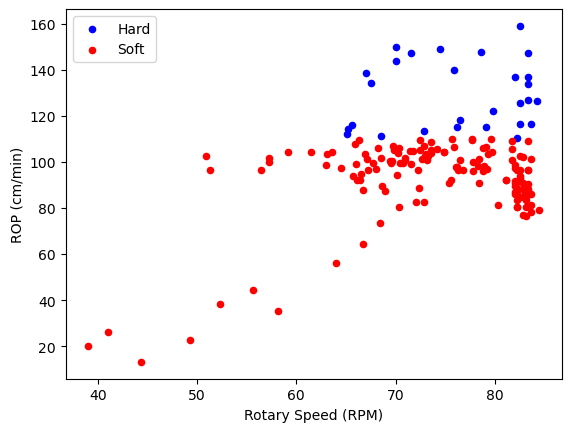

In [5]:
hard_data=data[data['Hard Rock']==1]
soft_data=data[data['Hard Rock']==0]

axes=hard_data.plot(kind='scatter',x='Rotary Speed (RPM)',y='ROP (cm/min)',color='blue',label='Hard')
axes=soft_data.plot(kind='scatter',x='Rotary Speed (RPM)',y='ROP (cm/min)',color='red',label='Soft',ax=axes)

# Identifying unwanted rows

Rows having data type as object can be either removed or transformed into numberical datatypes.

In [6]:
data.dtypes

Depth (m)             float64
Rotary Speed (RPM)    float64
Bit Load (N/100)      float64
Torque (N.cm)         float64
ROP (cm/min)          float64
Hard Rock               int64
dtype: object

# Remove unwanted columns

In [7]:
data.columns

feature_df=data[['Rotary Speed (RPM)', 'Bit Load (N/100)', 'Torque (N.cm)',
       'ROP (cm/min)']]

#x - independent variables
x=np.asarray(feature_df)
#y - dependent variables
y=np.asarray(data['Hard Rock'])

x[0:5]

array([[ 40.9972, 146.8531,  79.0698,  26.3889],
       [ 39.0582, 146.8531,  75.3488,  20.1389],
       [ 44.3213, 178.3216,  85.5814,  13.1944],
       [ 49.3075, 216.7833,  90.2326,  22.9167],
       [ 52.3546, 248.2519, 107.907 ,  38.1944]])

# Divide the data as Train/Test dataset

In [8]:
# data -> train (80%)/test (20%)
#train (x,y) - x itself is 2D array and y is 1D
#test (x,y)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
x_train.shape

(139, 4)

In [9]:
y_train.shape

(139,)

In [10]:
x_test.shape

(35, 4)

In [11]:
y_test.shape

(35,)

In [12]:
x_train

array([[ 44.3213, 178.3216,  85.5814,  13.1944],
       [ 79.1605, 606.086 , 164.4443, 115.2707],
       [ 72.3734, 627.2269, 151.8889,  88.877 ],
       [ 82.5485, 576.9228, 182.3256,  93.75  ],
       [ 83.6565, 597.9018, 188.8372, 101.3889],
       [ 66.4016, 585.7993, 151.4126,  92.3292],
       [ 79.6836, 619.1494, 166.1748, 104.3333],
       [ 58.1718, 283.2167,  97.6744,  35.4167],
       [ 70.3265, 585.7795, 164.0449, 105.994 ],
       [ 81.7174, 590.9089, 197.2093, 109.0277],
       [ 82.8255, 587.4123, 181.3954,  90.9722],
       [ 66.8831, 527.5994, 159.5082, 103.3929],
       [ 59.1469, 452.3612, 155.7455, 104.3441],
       [ 72.4916, 604.1231, 166.0851, 105.0632],
       [ 75.6233, 447.5525, 180.4651,  92.3611],
       [ 79.7784, 576.9228, 171.1628, 122.2222],
       [ 63.616 , 458.4572, 159.6595, 104.4312],
       [ 69.5775, 565.9327, 154.4157,  99.3185],
       [ 76.8156, 648.6434, 158.2462,  96.5283],
       [ 65.1361, 527.3043, 154.959 , 112.2094],
       [ 81.1634, 59

# Modelling (SVM with Scikit-learn)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimension space is called kernelling. The mathematical function used for the transformation is known as the kernel funtion, and can be of different types, such as:

1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. The one having the best accuracy is considered for the modelling.

In [13]:
from sklearn import svm

classifier=svm.SVC(kernel='linear', gamma='auto',C=12)
classifier.fit(x_train,y_train)

y_predict=classifier.predict(x_test)

In [14]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [15]:
from sklearn import metrics
print('Acuuracy Score with linear kernel:')

print(metrics.accuracy_score(y_test,y_predict))

Acuuracy Score with linear kernel:
0.9714285714285714


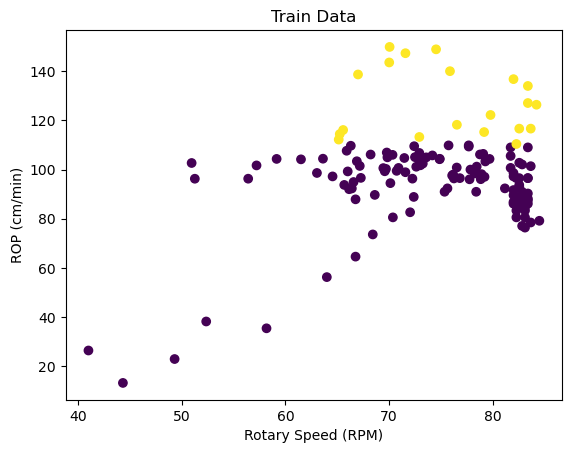

In [16]:
plt.scatter(x_train[:,0],x_train[:,3],c=y_train)
plt.xlabel('Rotary Speed (RPM)')
plt.ylabel('ROP (cm/min)')
plt.title('Train Data')
plt.show()

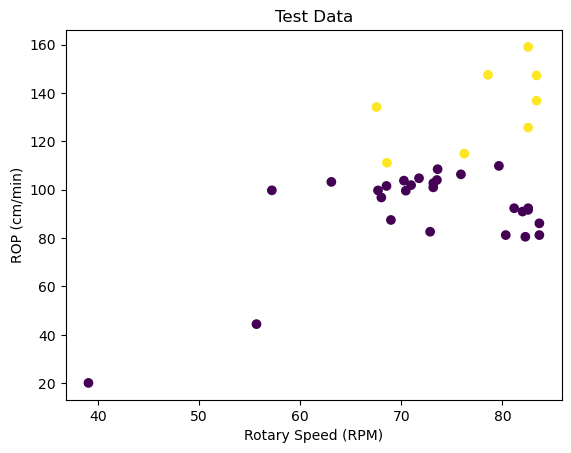

In [17]:
plt.scatter(x_test[:,0],x_test[:,3],c=y_test)
plt.xlabel('Rotary Speed (RPM)')
plt.ylabel('ROP (cm/min)')
plt.title('Test Data')
plt.show()

# Evaluation (Results)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.88      0.93         8

    accuracy                           0.97        35
   macro avg       0.98      0.94      0.96        35
weighted avg       0.97      0.97      0.97        35



In [21]:
classifier.predict([[64,150,100,44]])

array([0], dtype=int64)

In [20]:
classifier.predict([[112,123,111,120]])

array([1], dtype=int64)

In [45]:
classifier.predict([[70,100,90,100]])

array([1], dtype=int64)

In [23]:
classifier.predict([[45,111,90,88]])

array([0], dtype=int64)